![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

# Insper Pós-Graduação
## Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/)


# Atividade Integradora
## Setup

### Dependencias

In [1]:
import pandas as pd
import numpy as np
from dfply import *
import altair as alt
import missingno as msno
from ydata_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt 

/Users/mainaracardoso/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/mainaracardoso/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


### Carregamento dos Dados

In [2]:
data = pd.read_csv("cs_bisnode_panel.csv")
dicionario_de_dados_0 = pd.read_excel("bisnode_variable_names.xls", header=4)

In [3]:
data.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


## Limpeza dos Dados

### Dicionário de dados - Limpeza

Ao carregar o dicionário de dados a primeira coluna pega seu nome da quarta linha da tabela (argumento `header=4` acima). As outras três colunas são nomeadas abaixo.

In [4]:
dicionario_de_dados_1 = dicionario_de_dados_0.rename({'Unnamed: 1': 'description',
                                                      'Unnamed: 2': 'type',
                                                      'Unnamed: 3': 'footnote'},
                                                     axis=1)

In [5]:
dicionario_de_dados_1.columns

Index(['variable', 'description', 'type', 'footnote'], dtype='object')

Então, retiramos as linhas não relevantes para a análise, incluindo linhas totalmente em branco e uma linha com informação de versão da base de dados: 
 - `v 0.92. 2021-02-04`

In [6]:
dicionario_de_dados = dicionario_de_dados_1\
                       .drop(index=54)\
                       .dropna(how="all")\
                       .reset_index()\
                       .drop('index', axis='columns')

In [7]:
dicionario_de_dados.sample(5)

,variable,description,type,footnote
27,balsheet_length,balsheet_length,NaN,NaN
12,inc_bef_tax,incomde before tax,numeric,(euros)
3,COGS,costs of goods sold,numeric,(euros)
24,tang_assets,Tangible assets,numeric,(euros)
8,extra_inc,extra income,numeric,(euros)


## Dados
### Removendo colunas específicas:

In [8]:
columns_to_remove = ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D']

data.drop(columns=columns_to_remove, inplace=True)

data.columns

Index(['comp_id', 'begin', 'end', 'amort', 'curr_assets', 'curr_liab',
       'extra_exp', 'extra_inc', 'extra_profit_loss', 'fixed_assets',
       'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets',
       'material_exp', 'personnel_exp', 'profit_loss_year', 'sales',
       'share_eq', 'subscribed_cap', 'tang_assets', 'balsheet_flag',
       'balsheet_length', 'balsheet_notfullyear', 'year', 'founded_year',
       'exit_year', 'ceo_count', 'foreign', 'female', 'birth_year',
       'inoffice_days', 'gender', 'origin', 'nace_main', 'ind2', 'ind',
       'urban_m', 'region_m', 'founded_date', 'exit_date', 'labor_avg'],
      dtype='object')

### Removendo dados do ano 2016:
---

Registros que começaram ou terminaram (ocorreram em) 2016 são removidos do conjunto.

In [9]:
data = data[data["year"]!=2016]
data["year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

Dados destas colunas precisam estar em formato de datetime para serem operados corretamente, então vamos converte-los.

In [10]:
colunas_data = ["begin", "end", "founded_date", "exit_date"]

data.dtypes[colunas_data]

begin           object
end             object
founded_date    object
exit_date       object
dtype: object

In [11]:
for column in colunas_data:
    data[column] = pd.to_datetime(data[column], format="%Y-%m-%d")

data[colunas_data].dtypes

begin           datetime64[ns]
end             datetime64[ns]
founded_date    datetime64[ns]
exit_date       datetime64[ns]
dtype: object

### Missing data:
---

Vamos verificar dados faltando do banco de dados:

In [12]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

Verificando dados com maior falta de informações:

In [14]:
missing_data = show_missing(data).sort_values("pc_missing", ascending=False, ignore_index = True)

index_full_data = list(missing_data[missing_data["missing"]==0].index)

missing_data.drop(labels=index_full_data, axis="index", inplace=True)

missing_data

,variable,dtype,count,unique,missing,pc_missing
0,exit_year,float64,278086,19,239228,86.03
1,exit_date,datetime64[ns],278086,2603,221908,79.80
2,labor_avg,float64,278086,5556,146483,52.68
3,birth_year,float64,278086,264,110557,39.76
4,founded_year,float64,278086,39,56178,20.20
5,gender,object,278086,4,56148,20.19
6,origin,object,278086,4,56148,20.19
7,female,float64,278086,15,56148,20.19
8,foreign,float64,278086,16,56148,20.19
9,ceo_count,float64,278086,15,56148,20.19


Vamos iniciar tratando os dados que estejam com menos de 5% de dados faltando.

Podemos considerar que pela quantidade de dados estes casos são insignificantes no escopo total então vamos apenas remover estes.

(apenas para as colunas com baixa falta de dados ">5%")

In [15]:
removable_na_columns = list(missing_data["variable"][missing_data["pc_missing"]<5.0])

data.dropna(subset=removable_na_columns, ignore_index=True, inplace=True)

In [16]:
missing_val_columns = missing_data["variable"][missing_data["pc_missing"]>0]

<Axes: >

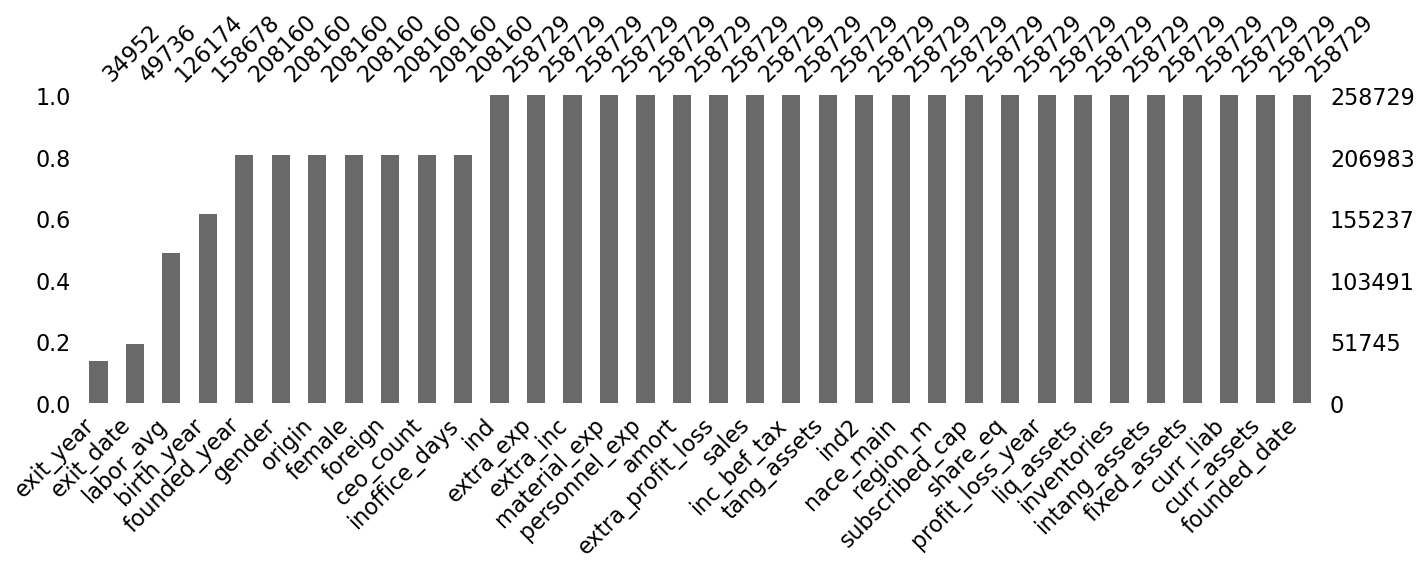

In [17]:
msno.bar(data[missing_val_columns], figsize=(16, 4))

In [18]:
missing_data_2 = show_missing(data).sort_values("pc_missing", ascending=False, ignore_index = True)

index_full_data_2 = list(missing_data_2[missing_data_2["missing"]==0].index)

missing_data_2.drop(labels=index_full_data_2, axis="index", inplace=True)

missing_data_2

,variable,dtype,count,unique,missing,pc_missing
0,exit_year,float64,258729,19,223777,86.49
1,exit_date,datetime64[ns],258729,2473,208993,80.78
2,labor_avg,float64,258729,5385,132555,51.23
3,birth_year,float64,258729,261,100051,38.67
4,inoffice_days,float64,258729,10876,50569,19.55
5,founded_year,float64,258729,39,50569,19.55
6,ceo_count,float64,258729,15,50569,19.55
7,foreign,float64,258729,16,50569,19.55
8,female,float64,258729,15,50569,19.55
9,gender,object,258729,4,50569,19.55


### Criando coluna para Variável Dependente:
---

- Vamos operar com o conceito de "atividade", empresas que não tiveram atividade por mais de 2 anos são consideradas "inativas".

Obs.: ativa = 0, inativa = 1

In [19]:
# Sort the DataFrame by company and year
data.sort_values(by=['comp_id', 'year'], inplace=True)

# Create shifted columns to check sales in the following 2 years
conditions_x1 = [((data['comp_id'] == data['comp_id'].shift(-1)) &
                  (data['year'] == data['year'].shift(-1) - 1)),

                 ((data['comp_id'] != data['comp_id'].shift(-1)) |
                  data['year'] != data['year'].shift(-1))]

values_x1 = [data['sales'].shift(-1),
             np.nan]

data['sales_x1'] = np.select(conditions_x1, values_x1)


conditions_x2 = [
    ((data['comp_id'] == data['comp_id'].shift(-1)) &   
     (data['year'] == data['year'].shift(-1) - 2)),

    ((data['comp_id'] == data['comp_id'].shift(-2)) &
     (data['year'] == data['year'].shift(-2) - 2)),

    True
]

values_x2 = [data['sales'].shift(-1),
             data['sales'].shift(-2),
             np.nan]

data['sales_x2'] = np.select(conditions_x2, values_x2)


# Create a condition to identify companies that ceased to operate 
# (sem vendas por mais de 2 anos)
c

# Create a new 'dependente' column with 1 for ceased companies and 0 otherwise
data['dependente'] = condition.astype(int)


Vamos conferir os valores da variavel dependente para as duas primeiras empresas do dataframe:

In [40]:
# lista de colunas para avaliação:
check_list=["comp_id", "year", "exit_year","sales", "sales_x1", "sales_x2", "dependente"]

filtro = data[check_list]
filtro[filtro["comp_id"] == 1001034]

,comp_id,year,exit_year,sales,sales_x1,sales_x2,dependente
0,1001034.0,2005,NaN,62751.851562,64625.925781,65100.000000,0
1,1001034.0,2006,NaN,64625.925781,65100.000000,78085.187500,0
2,1001034.0,2007,NaN,65100.000000,78085.187500,45388.890625,0
3,1001034.0,2008,NaN,78085.187500,45388.890625,9929.629883,0
4,1001034.0,2009,NaN,45388.890625,9929.629883,0.000000,0
5,1001034.0,2010,NaN,9929.629883,0.000000,0.000000,0
6,1001034.0,2011,NaN,0.000000,0.000000,0.000000,1
7,1001034.0,2012,NaN,0.000000,0.000000,0.000000,1
8,1001034.0,2013,NaN,0.000000,0.000000,0.000000,1
9,1001034.0,2014,NaN,0.000000,0.000000,NaN,0


In [22]:
data[check_list].describe()

,comp_id,year,sales,sales_x1,sales_x2,dependente
count,2.587290e+05,258729.000000,2.587290e+05,2.102100e+05,1.733920e+05,258729.000000
mean,1.540156e+11,2010.448319,4.731183e+05,5.137581e+05,5.466187e+05,0.052217
std,1.382643e+11,3.066244,3.775571e+06,3.852350e+06,3.959644e+06,0.222464
min,1.001034e+06,2005.000000,-1.472559e+07,-4.730166e+06,-2.553889e+05,0.000000
25%,2.857290e+10,2008.000000,4.744444e+03,7.267593e+03,7.151852e+03,0.000000
50%,1.153078e+11,2011.000000,3.042222e+04,3.648333e+04,3.798518e+04,0.000000
75%,2.593265e+11,2013.000000,1.106704e+05,1.275222e+05,1.357694e+05,0.000000
max,4.641209e+11,2015.000000,1.110294e+08,1.110294e+08,1.110294e+08,1.000000


Vemos que temos dados de venda com erros, onde há valores negativos para vendas, vamos tratar estes dados substituindo valores negativos por nulos (valor = 0)

In [23]:
# Remodelando os dados de vendas para corrigir os erros:

for x in ["sales", "sales_x1", "sales_x2"]:
    data[x] = np.where(data[x]<0, 0, data[x])

data['dependente'] = condition.astype(int)

In [24]:
data[check_list].describe()

,comp_id,year,sales,sales_x1,sales_x2,dependente
count,2.587290e+05,258729.000000,2.587290e+05,2.102100e+05,1.733920e+05,258729.000000
mean,1.540156e+11,2010.448319,4.731984e+05,5.137855e+05,5.466241e+05,0.052217
std,1.382643e+11,3.066244,3.775438e+06,3.852332e+06,3.959643e+06,0.222464
min,1.001034e+06,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.857290e+10,2008.000000,4.744444e+03,7.267593e+03,7.151852e+03,0.000000
50%,1.153078e+11,2011.000000,3.042222e+04,3.648333e+04,3.798518e+04,0.000000
75%,2.593265e+11,2013.000000,1.106704e+05,1.275222e+05,1.357694e+05,0.000000
max,4.641209e+11,2015.000000,1.110294e+08,1.110294e+08,1.110294e+08,1.000000


Corrigimos os valores de vendas negativas, e assim também de dependentes que pudessem estar sendo afetados.

Vamos agora:
 
- tratar por fim os casos em que não há informações de venda para um próximo ano (por não haver um próximo ano;

- criar uma coluna de vendas em "Log" para tratar a assimetria dos dados.

Vamos averiguar agora os anos em que as empresas tiveram atividade e inatividade:

In [27]:
data_grouped = data.groupby('comp_id')

#Contando anos de acompanhamento
comp_years = data_grouped['year'].count()

#Contando anos de "atividade"
active_years = data_grouped.apply(lambda group: (group['sales'] > 0).sum())

#contando anos sem vendas
years_no_sales = data_grouped.apply(lambda group: (group['sales'] == 0).sum())

#Contando anos de "inatividade"
inative_years = data_grouped.apply(lambda group: (group['dependente'] == 1).sum())

In [28]:
activity_df = pd.DataFrame({"Total years":comp_years,
                            "Active years":active_years, 
                            "Year no sales":years_no_sales,
                            "Inative years":inative_years})

activity_df

,Total years,Active years,Year no sales,Inative years
comp_id,,,,
1.001034e+06,11,6,5,3
1.001541e+06,7,5,2,0
1.002029e+06,9,9,0,0
1.003200e+06,8,8,0,0
1.004012e+06,8,8,0,0
...,...,...,...,...
4.640212e+11,9,9,0,0
4.640446e+11,8,7,1,0
4.640568e+11,3,3,0,0


## 2012

In [50]:
data_2012 = data[data['year'] == 2012].copy()
data_2012.year.unique()

array([2012])

In [30]:
import math

### Sales

In [51]:
data_2012.sales.describe()

count    2.646300e+04
mean     4.201372e+05
std      3.375868e+06
min      0.000000e+00
25%      3.261111e+03
50%      2.519259e+04
75%      9.627407e+04
max      1.058662e+08
Name: sales, dtype: float64

Valores negativos não são válidos para a váriavel `sales`. O tratamento escolhido nesse caso é substituir valores negativos por 0.

In [52]:
data_2012.loc[data['sales'] < 0] = 0
data_2012.sales.describe()

count    2.646300e+04
mean     4.201372e+05
std      3.375868e+06
min      0.000000e+00
25%      3.261111e+03
50%      2.519259e+04
75%      9.627407e+04
max      1.058662e+08
Name: sales, dtype: float64

Podemos ver ainda nas estatísticas descritivas que a média é maior que o terceiro quartil, indicando uma distribuição bastante assimétrica. Criamos então uma com o logarítmo de `sales` para auxiliar na análise.

In [53]:
data_2012.loc[:,'log_sales'] = data_2012.sales\
                                        .apply(lambda x: math.log(x)\
                                               if x != 0\
                                               else 0)

data_2012.log_sales.describe()

count    26463.000000
mean         8.801709
std          4.366247
min          0.000000
25%          8.089823
50%         10.134305
75%         11.474954
max         18.477687
Name: log_sales, dtype: float64

### Idade da Empresa
A idade da empresa eh calculada pela subtracao de `year` por `founded_year`, e a informacao eh guardada em `comp_age`.

In [54]:
data.year.isna().sum()

0

In [55]:
data.founded_year.isna().sum()

50569

In [56]:
duplicates = {'company': [], 'years': []}
nulls = {'company': [], 'years': []}

for company in data_2012.comp_id.unique():
    company_year = data_2012.loc[data_2012['comp_id'] == company,
                                 'founded_year'].unique()
    if len(company_year) != 1:
        duplicates['company'].append(company)
        duplicates['years'].append(company_year)
    elif np.nan in company_year:
        nulls['company'].append(company)
        nulls['years'].append(company_year)

nulls

{'company': [], 'years': []}

In [57]:
data_2012.loc[data_2012['comp_id'] == 1001034,
              'founded_year'].unique()

array([1990.])

In [58]:
data_2012.loc[(data_2012['comp_id'] == 1001034) &
              (data_2012['founded_year'] == np.nan)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,ind,urban_m,region_m,founded_date,exit_date,labor_avg,sales_x1,sales_x2,dependente,log_sales


Criação de variáveis

In [59]:
# 1. Idade da Empresa:
data_2012['company_age'] = 2012 - data_2012['founded_year']

In [60]:
# 2. Taxa de Crescimento de Vendas:
# Taxa de crescimento: (valor_atual - valor_anterior) / valor_anterior
data_2012['sales_growth_rate'] = (data_2012['sales'] - data_2012['sales_x1']) / data_2012['sales_x1']

In [61]:
# 3. Alavancagem Financeira:
data_2012['financial_leverage'] = data_2012['curr_liab'] / data_2012['share_eq']

In [62]:
# 4. Liquidez:
data_2012['liquidity_ratio'] = data_2012['liq_assets'] / data_2012['curr_liab']

In [63]:
# 5. Eficiência:
data_2012['efficiency'] = data_2012['sales'] / data_2012['labor_avg']

In [64]:
# 6. Duração do CEO no Cargo:
data_2012['ceo_duration_years'] = data_2012['inoffice_days'] / 365.0

In [65]:
# 7. Tamanho da Empresa (exemplo baseado em vendas):
sales_bins = [0, 1e6, 1e9, float('inf')]  # Exemplo de categorias: <1M, 1M-1B, >1B
labels = ['small', 'medium', 'large']
data_2012['company_size'] = pd.cut(data_2012['sales'], bins=sales_bins, labels=labels, right=False)

In [66]:
# 8. Margem de Lucro:
data_2012['profit_margin'] = data_2012['profit_loss_year'] / data_2012['sales']

In [67]:
data_2012.to_csv("data_2012")